<a href="https://colab.research.google.com/github/kavdoot/BHARAT_INTERN/blob/main/cats_and_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import os
import zipfile
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
import cv2

In [15]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [16]:
# Unzip the dataset
with zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [17]:
# Load the dataset with smaller image size
IMG_SIZE = (128, 128)
BATCH_SIZE = 16

train_ds = keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [18]:
# Normalize the data
def process(image, label):
    image = tf.cast(image / 255.0, tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [19]:
# Optimize data loading
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_ds = validation_ds.cache().prefetch(buffer_size=tf.data.AUTOTUNE)


In [20]:
model = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(1, activation='sigmoid')
])


In [21]:
# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 batch_normalization_3 (Bat  (None, 126, 126, 16)      64        
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 batch_normalization_4 (Bat  (None, 61, 61, 32)        128       
 chNormalization)                                                
                                                      

In [25]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [22]:
# Define callbacks
checkpoint = ModelCheckpoint('model_checkpoint.h5', save_best_only=True)
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

In [26]:
# Train the model
history = model.fit(
    train_ds,
    epochs=10,
    validation_data=validation_ds,
    callbacks=[checkpoint, early_stopping]
)

Epoch 1/10
1250/1250 [==============================] - 382s 290ms/step - loss: 0.6451 - accuracy: 0.6665 - val_loss: 0.5563 - val_accuracy: 0.7294
Epoch 2/10
1250/1250 [==============================] - 352s 282ms/step - loss: 0.4732 - accuracy: 0.7780 - val_loss: 0.4759 - val_accuracy: 0.7788
Epoch 3/10
1250/1250 [==============================] - 353s 282ms/step - loss: 0.3885 - accuracy: 0.8281 - val_loss: 0.4829 - val_accuracy: 0.7770
Epoch 4/10
1250/1250 [==============================] - 353s 282ms/step - loss: 0.3275 - accuracy: 0.8557 - val_loss: 0.4220 - val_accuracy: 0.8076
Epoch 5/10
1250/1250 [==============================] - 378s 302ms/step - loss: 0.2592 - accuracy: 0.8909 - val_loss: 0.3426 - val_accuracy: 0.8510
Epoch 6/10
1250/1250 [==============================] - 373s 298ms/step - loss: 0.1990 - accuracy: 0.9158 - val_loss: 0.8395 - val_accuracy: 0.7612
Epoch 7/10
1250/1250 [==============================] - 357s 286ms/step - loss: 0.1488 - accuracy: 0.9395 - val_

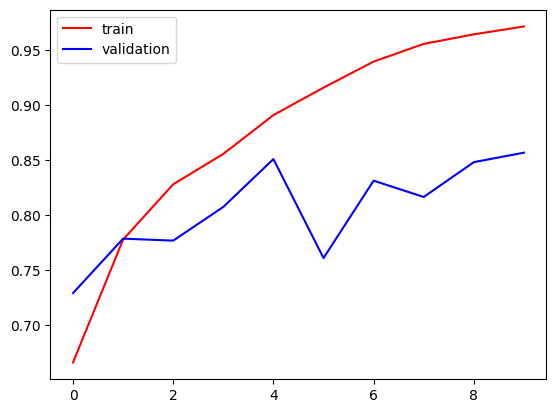

In [27]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

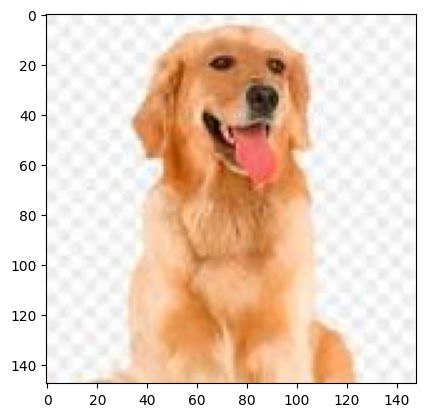

In [35]:
 #Test the model
test_img = cv2.imread('/content/dog.jpeg')
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.show()

In [36]:
test_img = cv2.resize(test_img, (128, 128))
test_input = test_img.reshape((1, 128, 128, 3))
test_input = test_input / 255.0  # Normalize

In [37]:

# Predict
prediction = model.predict(test_input)
print(f"Prediction: {'Dog' if prediction[0] > 0.5 else 'Cat'}")

1/1 [==============================] - 0s 26ms/step
Prediction: Dog


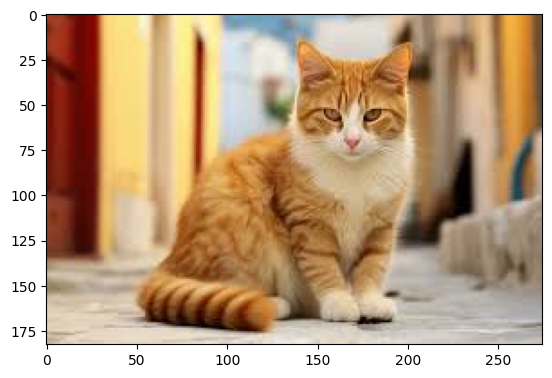

In [38]:
 #Test the model
test_img = cv2.imread('/content/cat.jpg')
plt.imshow(cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB))
plt.show()

In [39]:
test_img = cv2.resize(test_img, (128, 128))
test_input = test_img.reshape((1, 128, 128, 3))
test_input = test_input / 255.0  # Normalize

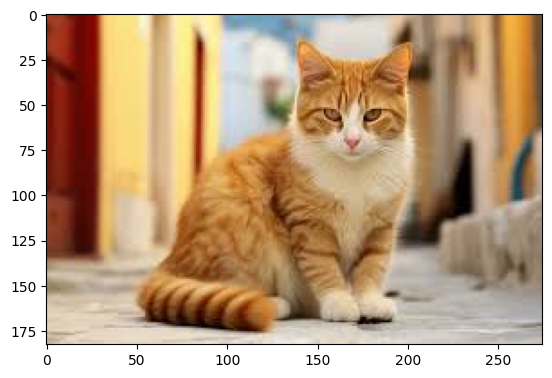

In [41]:

# Predict
prediction = model.predict(test_input)
print(f"Prediction: {'Dog' if prediction[0] > 0.5 else 'Cat'}")

1/1 [==============================] - 0s 42ms/step
Prediction: Cat
